In [10]:
import numpy as np

a = np.array([1,2,3,4,5,6,7,8,9,10], dtype=float)
int_ms1 = np.array([5, 5, 6], dtype=float)
int_ms1 = np.append(int_ms1, np.sort(a)[:(int(len(a)*0.15)+1)])
print(int_ms1)

[5. 5. 6. 1. 2.]


In [7]:
# round up the given number
number = 3.9
int(number)


3

In [23]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
b = 4.0
np.isclose(a, b, atol=0.1).nonzero()[0]

array([3], dtype=int64)

In [16]:
np.isclose(a, b, atol=0.1)

array([False, False, False,  True, False, False, False, False, False,
       False])

In [24]:
import metabengine as mbe

In [25]:
testing_data = "D:/Data/Longevity_female_QCs/mzML/PoolQC01_MX612252_PosLIPIDS_postLongevity_Female013.mzML"
d = mbe.read_raw_file_to_obj(testing_data)
testing_data_blank = "D:/Data/Longevity_female_QCs/mzML_blanks/MtdBlank03_MX612252_posLIPIDS_Longevity_Female004.mzML"
d_blank = mbe.read_raw_file_to_obj(testing_data_blank)

Number of extracted MS1 scans: 1869
Number of extracted MS2 scans: 143


In [27]:
import json
with open('./src/metabengine/data/lipid_istd_pos.json', 'r') as f:
    stds = json.load(f)

In [92]:
stds[18]

{'name': 'C24:1 Ceramide-d7 (d18:1-d7/24:1)',
 'formula': 'C42H74D7NO3',
 'common_adducts': ['[M+H]+', '[M+NH4]+'],
 'common_adducts_mz': [655.6729, 672.6994],
 'preferred_adduct': '[M+H]+'}

In [85]:
stds[9]['common_adducts_mz'].append(634.615010)
stds[9]

{'name': '14:1 cholesteryl-d7 ester',
 'formula': 'C41H63D7O2',
 'common_adducts': ['[M+H]+', '[M+NH4]+'],
 'common_adducts_mz': [602.5888, 619.6153, 584.57823, 634.61501],
 'preferred_adduct': '[M+H]+'}

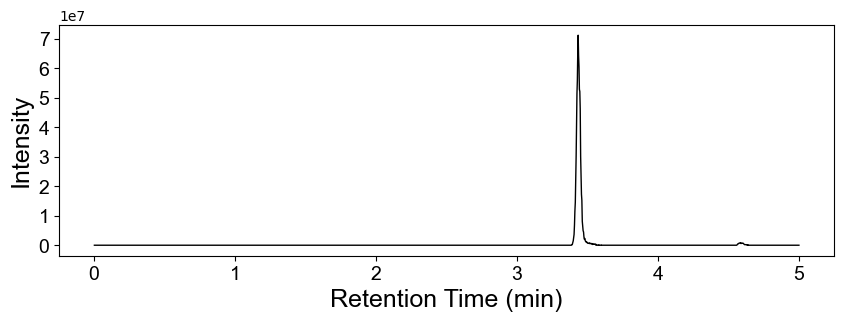

In [95]:
d_blank.plot_eic(677.654803, mz_tol=0.01, rt_range=[0,5]) 

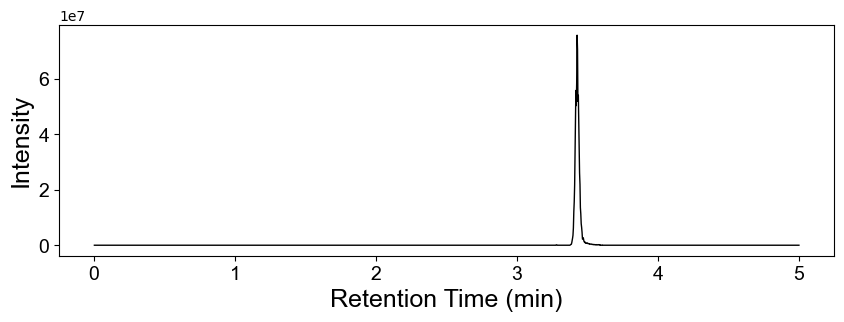

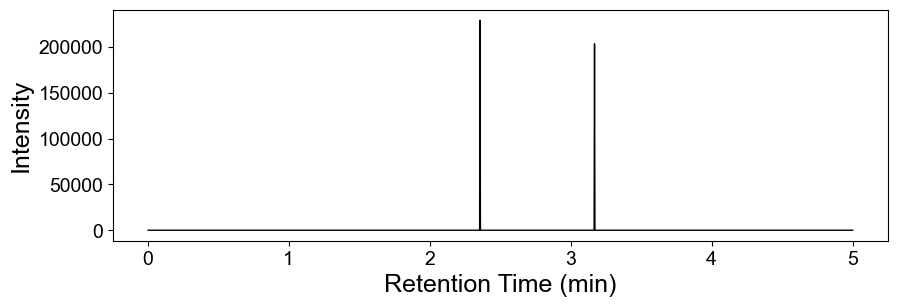

C24:1 Ceramide-d7 (d18:1-d7/24:1)


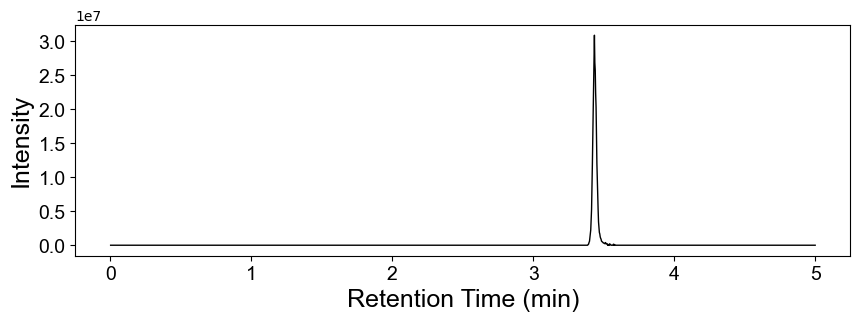

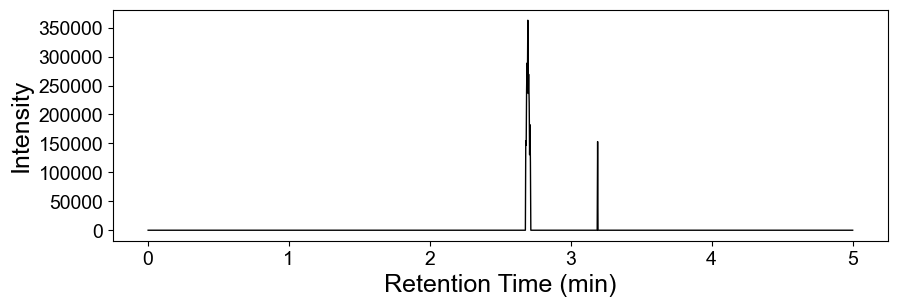

C24:1 Ceramide-d7 (d18:1-d7/24:1)


In [91]:
idx = 18

for i in stds[idx]['common_adducts_mz']:
    d.plot_eic(i, mz_tol=0.01, rt_range=[0,5])
print(stds[idx]['name'])

for i in stds[idx]['common_adducts_mz']:
    d_blank.plot_eic(i, mz_tol=0.01, rt_range=[0,5])
print(stds[idx]['name'])

In [1]:
from metabengine import lcb_workflow

db = lcb_workflow.load_internal_standard_library("lipidomics", "positive")

In [3]:
import numpy as np

a = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=float)
b = np.array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=float)
c = np.array([a, b])
np.where(c.sum(axis=0))[0]

array([0, 1, 2], dtype=int64)

In [4]:
import json


with open("/MyPackages/metabengine/src/metabengine/data/lipid_istd_pos.json", 'r') as f:
    a = json.load(f)

In [14]:
a[10]["rt"] != a[10]["rt"]

True

# RT corrections

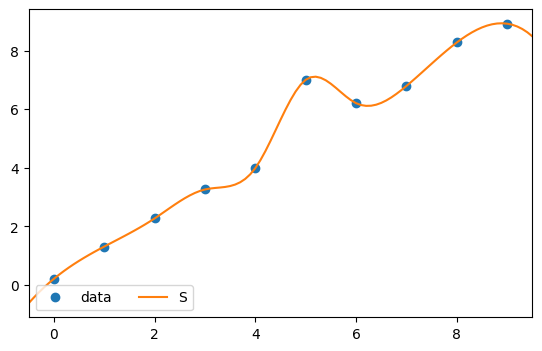

In [27]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
# x = np.arange(10)
# y = x + np.random.randn(10) * 0.2
cs = CubicSpline(x, y, extrapolate=True)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')

ax.plot(xs, cs(xs), label="S")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

In [59]:
y[5] = 6

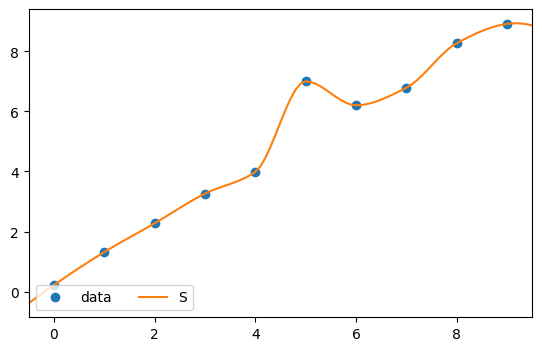

In [26]:
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.pyplot as plt
cs = PchipInterpolator(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')

ax.plot(xs, cs(xs), label="S")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

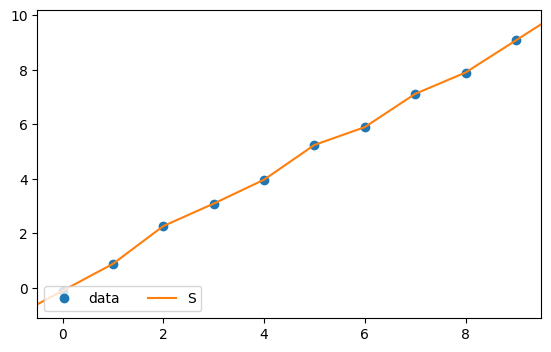

In [55]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
x = np.arange(10)
y = x + np.random.randn(10) * 0.2
cs = interp1d(x, y, bounds_error=False, fill_value="extrapolate")
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')

ax.plot(xs, cs(xs), label="S")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

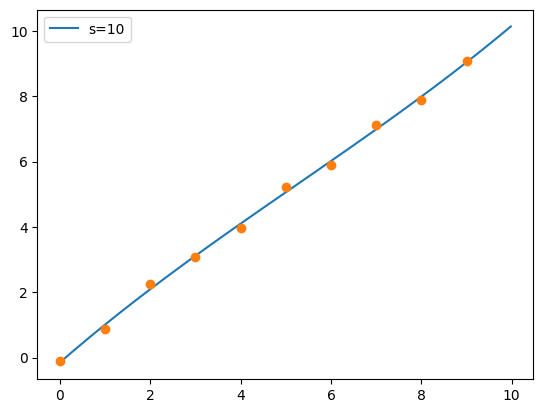

In [57]:
from scipy.interpolate import splrep, BSpline
tck = splrep(x, y, s=0)
tck_s = splrep(x, y, s=0.15)

import matplotlib.pyplot as plt
xnew = np.arange(0, 10, 1/50)
# plt.plot(xnew, BSpline(*tck)(xnew), '-', label='s=0')
plt.plot(xnew, BSpline(*tck_s)(xnew), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

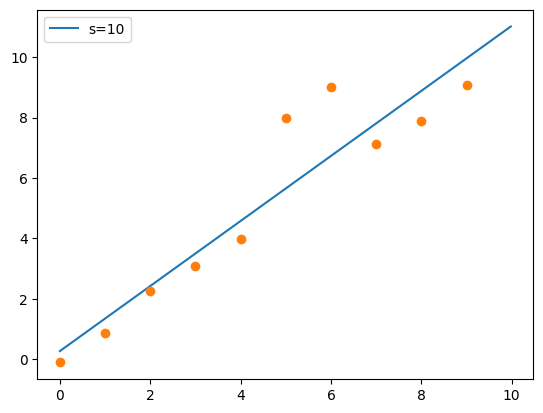

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1, 1), y)

import matplotlib.pyplot as plt
xnew = np.arange(0, 10, 1/50)
plt.plot(xnew, reg.predict(xnew.reshape(-1, 1)), '-', label=f's={len(x)}')
plt.plot(x, y, 'o')
plt.legend()
plt.show()

In [68]:
y[5] = 8
y[6] = 9

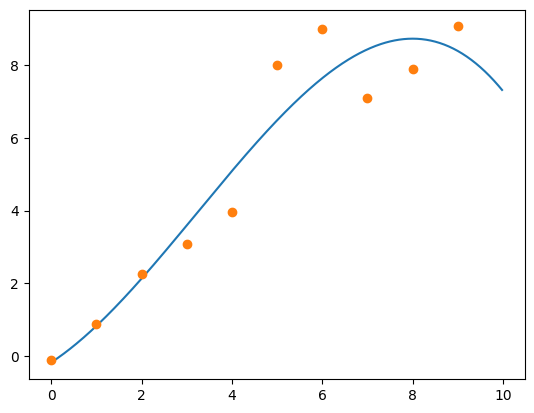

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.vstack([x, x**2, x**3]).T, y)

xnew = np.arange(0, 10, 1/50)
plt.plot(xnew, reg.predict(np.vstack([xnew, xnew**2, xnew**3]).T))
plt.plot(x, y, 'o')
plt.show()

In [73]:
a = np.array([[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10]])
a[0]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [74]:
b = a.T
b[0]

array([1, 1])